<a href="https://colab.research.google.com/github/orital04/tinyProject2OriTal/blob/main/tinyProject2OriTal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir=rtl>
<h1> פרויקטון 2 - אורי טל

<div dir=rtl>
<H1> הצגת הבעיה 

 במחברת הזו, ננסה לענות על השאלה: האם ניתן לחזות האם אפליקציה בחנות האפליקציות App Store תצליח (ציון של יותר מ4 על ידי המשתמשים), על ידי מאפיינים אחרים של האפליקציות?


<div dir=rtl>
<H1> ייבוא הספריות הדרושות <a class="anchor" name="2"></a> </H1>

In [ ]:
# טעינת הספריות הדרושות

import numpy as np # אלגברה לינארית
import pandas as pd # עיבוד מידע, קריאת קבצי csv

# ספריות גרפיות
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import io

In [ ]:
import warnings

warnings.filterwarnings('ignore') # נתעלם מאזהרות שעלולות להופיע

<div dir=rtl>
<H1> ייבוא מערך הנתונים <a class="anchor" name="3"></a>

זה על מנת להשתמש במערך הנתונים (כך שניתן יהיה לקרוא את קובץ הcsv - מערך הנתונים שלי), ניתן לייבא את מערך הנתונים מהדרייב שלי (על ידי כך ששמרתי אותו בדרייב שלי).
עם זאת החלטתי לייבא את מערך הנתונים על ידי כך שהעליתי אותו לחשבון הגיטהאב שלי - ומפה אני משתמש בזה.
</div>

In [ ]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

In [ ]:
#df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/tinyProjectsOriTal/appStore dataset.csv')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/orital04/tinyProject2OriTal/main/appStore%20dataset.csv')

<div dir=rtl>
<H1> ניתוח נתונים מתקדם / Exploratory data analysis <a class="anchor" name="4"></a>

- ייבאנו את הנתונים. 

- עכשיו הגיע הזמן לחקור את הנתונים כדי להבין אותם יותר טוב.

<h1> זה בשילוב עם הנדסת מאפיינים / Feature Engineering <a class="anchor" name="10"></a> </h1>

Feature Engineering זהו התהליך שבו נהפוך את הנתונים הגולמיים לנתונים משמעותיים שיעזרו לנו בהבנת המודל בצורה טוב יותר ושיפור את כח הניבוי שלו.

את התהליך נבצע על סוגי משתנים שונים.

קודם נציג את הנתונים המספריים והנתונים הקטגוריאליים בצורה נפרדת.
</div>

In [ ]:
df.shape

(7197, 17)

<div dir=rtl>
מכך אני יודע שיש במערך הנתונים 7197 דוגמאות (אפליקציות) ו- 17 תכונות עבור כל דוגמה
</div>

<div dir=rtl>
<h1> הצגה של מערך הנתונים <a class="anchor" name="4.2"></a>

In [ ]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


<div dir=rtl>
<h1> הצגת שמות העמודות <a class="anchor" name="4.3"></a>

In [ ]:
col_names = df.columns
col_names

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

<div dir=rtl>
<h1> הצגת סיכום מערך הנתונים <a class="anchor" name="4.5"></a>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


<div dir=rtl>
תיאור של התכונות (העמודות): id של כל עמודה, השם של כל עמודה, הטיפוס של הנתונים בכל עמודה (טיפוס הנתונים אותו ניתן לקבל), כמה משתנים לא חסרים יש בכל עמודה

#### הערה:

- אנו יכולים לראות כי מערך הנתונים מכיל תערובת של משתנים קטגוריאלים ומספריים.

- המשתנים הקטגוריאלים הם מסוג `object`.

-  המשתנים המספריים הם מסוג `float64` או מסוג `int64`.

- כמו כן, אין ערכים חסרים במערך הנתונים, כך שאין טעם להתעסק בנושא הזה בהמשך.

</div>

<div dir=rtl>
הצגת מאפיינים סטטיסטיים של מערך הנתונים <a class="anchor" name="4.6"></a> - לגבי המשתנים הנומריים

In [ ]:
df.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


<div dir=rtl>
אני מוחק עמודות שאני לא יכול להשתמש בהן בהמשך שכן הן לא אומרות כלום מבחינת השלכות על עמודות אחרות באופן ודאי (כגון הסדר בו האפליקציות מסודרות במערך זה).
כמו כן, אני מעוניין לחזות את ה`user_rating` הכללי, כך שהעמודות של `user_rating_ver` ושל `rating_count_tot` מיותרות (שכן הן מתייחסות בדיוק לחלק מתוך מה שאני חוזה - הדירוג של האפליקציה רק בגרסתה החדשה (וגם כמות המדרגים בגרסה החדשה שזה מתקשר לזה על אף שאני לא חוזה את זה)

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'id', 'rating_count_ver', 'user_rating_ver'])


<div dir=rtl>
כמו כן בהמשך עלולות להיות בעיות עם שמות שמכילים בתוכם נקודה(.), ועל כן אשנה את שמם כעת

In [ ]:
df = df.rename(columns={'lang.num': 'lang_num', 'sup_devices.num': 'sup_devices_num', 'ipadSc_urls.num': 'ipadSc_urls_num'})

In [ ]:
df.head()

,track_name,size_bytes,currency,price,rating_count_tot,user_rating,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,PAC-MAN Premium,100788224,USD,3.99,21292,4.0,6.3.5,4+,Games,38,5,10,1
1,Evernote - stay organized,158578688,USD,0.00,161065,4.0,8.2.2,4+,Productivity,37,5,23,1
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,3.5,5.0.0,4+,Weather,37,5,3,1
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,4.0,5.10.0,12+,Shopping,37,5,9,1
4,Bible,92774400,USD,0.00,985920,4.5,7.5.1,4+,Reference,37,5,45,1


<div dir=rtl>
כעת אמחק שורות שמופיעות יותר מפעם אחת במערך

In [ ]:
temp_df = df.drop_duplicates()
temp_df.count()

track_name          7197
size_bytes          7197
currency            7197
price               7197
rating_count_tot    7197
user_rating         7197
ver                 7197
cont_rating         7197
prime_genre         7197
sup_devices_num     7197
ipadSc_urls_num     7197
lang_num            7197
vpp_lic             7197
dtype: int64

<div dir=rtl>
<h1> חקירת משתנה היעד - `user_rating` <a class="anchor" name="5"></a>

<div dir=rtl>
על פניו גיליתי שאין ערכים חסרים בכל מערך הנתונים כך שאין סיבה לבדוק את זה גם פה, וניתן גם לוודא את זה עוד פעם ליתר ביטחון בשל החשיבות בגילוי ערכים חסרים במשתנה היעד

In [ ]:
df['user_rating'].isnull().sum()

0

<div dir=rtl>
הצגת מספר הערכים הייחודיים

In [ ]:
df['user_rating'].nunique()

10

<div dir=rtl>
הצגת הערכים הייחודיים

In [ ]:
df['user_rating'].unique()

array([4. , 3.5, 4.5, 5. , 3. , 2. , 2.5, 0. , 1.5, 1. ])

<div dir=rtl>
הצגת התפלגות הערכים

In [ ]:
df['user_rating'].value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

<div dir=rtl>
הצגת אחוזי ההתפלגות של הערכים

In [ ]:
df['user_rating'].value_counts()/len(df)

4.5    0.370015
4.0    0.225927
0.0    0.129082
3.5    0.097541
5.0    0.068362
3.0    0.053217
2.5    0.027234
2.0    0.014728
1.5    0.007781
1.0    0.006114
Name: user_rating, dtype: float64

<div dir=rtl>

#### הערה

- אנו יכולים לראות כי מתוך המספר הכולל של ערכי המשתנה, בערך 37% מהם מדורגים בציון `4.5`, ו- 22% בציון 4 (`4.0`)
</div>

<div dir=rtl>
ניתן לראות שיש לא מעט ערכים (אפליקציות) שעבורם הציון הוא 0. על כן אסיר ליתר ביטחון את הערכים בהם `rating_count_tot` שווה 0, משמע ערכים עבורם הציון 0 (`user_rating`=0) בעצם מהווה ערך חסר (null)
</div>

In [ ]:
df = df[df['rating_count_tot'] != 0.0]

<div dir=rtl>
כעת אציג שוב את חקירת הנתונים על `user_rating`

In [ ]:
df['user_rating'].nunique()

9

In [ ]:
df['user_rating'].unique()

array([4. , 3.5, 4.5, 5. , 3. , 2. , 2.5, 1.5, 1. ])

In [ ]:
df['user_rating'].value_counts()

4.5    2663
4.0    1626
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

In [ ]:
df['user_rating'].value_counts()/len(df)

4.5    0.424856
4.0    0.259413
3.5    0.111997
5.0    0.078494
3.0    0.061104
2.5    0.031270
2.0    0.016911
1.5    0.008934
1.0    0.007020
Name: user_rating, dtype: float64

<div dir=rtl>
ניתן לראות שאין יותר אפליקציות עבורן הערך של `user_rating` הוא 0

In [ ]:
df.head()

,track_name,size_bytes,currency,price,rating_count_tot,user_rating,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,PAC-MAN Premium,100788224,USD,3.99,21292,4.0,6.3.5,4+,Games,38,5,10,1
1,Evernote - stay organized,158578688,USD,0.00,161065,4.0,8.2.2,4+,Productivity,37,5,23,1
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,3.5,5.0.0,4+,Weather,37,5,3,1
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,4.0,5.10.0,12+,Shopping,37,5,9,1
4,Bible,92774400,USD,0.00,985920,4.5,7.5.1,4+,Reference,37,5,45,1


<div dir=rtl>
כעת אני אחקור את המשתנים הקטגוריאליים

In [ ]:
# מציאת משתנים קטגוריאליים

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['track_name', 'currency', 'ver', 'cont_rating', 'prime_genre']


In [ ]:
# הצגת המשתנים הקטגוריאליים

df[categorical].head()

,track_name,currency,ver,cont_rating,prime_genre
0,PAC-MAN Premium,USD,6.3.5,4+,Games
1,Evernote - stay organized,USD,8.2.2,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,5.0.0,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,5.10.0,12+,Shopping
4,Bible,USD,7.5.1,4+,Reference


In [ ]:
# בדיקת קרדינליות לכל משתנה, קרדינליות = מספר התוויות במשתנה קטגוריאלי, כשמספר גבוה של תוויות מכונה קרדינליות גבוהה. קרדינליות גבוהה עלולה להוות בעיה חמורה במודל למידת המכונה.

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

track_name  contains  6266  labels
currency  contains  1  labels
ver  contains  1490  labels
cont_rating  contains  4  labels
prime_genre  contains  23  labels


<div dir=rtl>
ניתן לראות שלעמודות (משתנים) `track_name` ו-`ver` יש קרדינליות גבוהה, ושלעמודה `currency` יש ערך 1 שקיים עבור כל הערכים במערך. לכן אין סיבה להשאיר את הערכים האלו במערך בעבור המודל - בנוגע לעמודות עם יותר מדי משתנים - לעשות one hot encoder יגרום למערך להיות גדול מדי ובנוסף לא תהיה לזה השפעה אמיתית על החיזוי, ולעמודה עם אותו ערך - מן הסתם שעמודה זו לא תשפיע כלל על החיזוי, שכן יש בה רק ערך אחד.
על כן אסיר את עמודות אלו ממערך הנתונים

In [ ]:
df = df.drop(columns=['track_name', 'ver', 'currency'])

In [ ]:
# מציאת משתנים קטגוריאליים

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['cont_rating', 'prime_genre']


In [ ]:
# הצגת המשתנים הקטגוריאליים

df[categorical].head()

,cont_rating,prime_genre
0,4+,Games
1,4+,Productivity
2,4+,Weather
3,12+,Shopping
4,4+,Reference


In [ ]:
# הצגת התדירות לכל משתנה

for var in categorical: 
    
    print(df[var].value_counts())

4+     3937
12+    1004
9+      886
17+     441
Name: cont_rating, dtype: int64
Games                3400
Entertainment         471
Education             387
Photo & Video         325
Utilities             219
Productivity          172
Health & Fitness      159
Social Networking     134
Music                 134
Lifestyle             113
Shopping              106
Sports                101
Travel                 71
Finance                71
Weather                66
Book                   65
News                   60
Reference              53
Business               53
Food & Drink           52
Navigation             31
Medical                20
Catalogs                5
Name: prime_genre, dtype: int64


In [ ]:
# הצגת ההתפלגות של התדירות

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

4+     0.628111
12+    0.160179
9+     0.141353
17+    0.070357
Name: cont_rating, dtype: float64
Games                0.542438
Entertainment        0.075144
Education            0.061742
Photo & Video        0.051851
Utilities            0.034939
Productivity         0.027441
Health & Fitness     0.025367
Social Networking    0.021378
Music                0.021378
Lifestyle            0.018028
Shopping             0.016911
Sports               0.016114
Travel               0.011327
Finance              0.011327
Weather              0.010530
Book                 0.010370
News                 0.009572
Reference            0.008456
Business             0.008456
Food & Drink         0.008296
Navigation           0.004946
Medical              0.003191
Catalogs             0.000798
Name: prime_genre, dtype: float64


In [ ]:
# בדיקת קרדינליות לכל משתנה

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

cont_rating  contains  4  labels
prime_genre  contains  23  labels


<div dir=rtl>
<h1> חקירת משתנים מספריים <a class="anchor" name="6.5"></a>

In [ ]:
# מציאת משתנים מספריים

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['size_bytes', 'price', 'rating_count_tot', 'user_rating', 'sup_devices_num', 'ipadSc_urls_num', 'lang_num', 'vpp_lic']


In [ ]:
# הצגת המשתנים המספריים

df[numerical].head()

,size_bytes,price,rating_count_tot,user_rating,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,100788224,3.99,21292,4.0,38,5,10,1
1,158578688,0.00,161065,4.0,37,5,23,1
2,100524032,0.00,188583,3.5,37,5,3,1
3,128512000,0.00,262241,4.0,37,5,9,1
4,92774400,0.00,985920,4.5,37,5,45,1


In [ ]:
# הצגת סיכום הסטטיסטיקה במשתנים מספריים (עם עיגול ל2 ספרות אחרי הנקודה אם ניתן במערך)

round(df[numerical].describe(),2)

,size_bytes,price,rating_count_tot,user_rating,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
count,6.268000e+03,6268.00,6268.00,6268.00,6268.00,6268.00,6268.00,6268.00
mean,2.057430e+08,1.82,14803.81,4.05,37.26,3.87,5.89,1.00
std,3.526341e+08,6.13,80984.68,0.73,3.91,1.88,8.20,0.07
min,5.898240e+05,0.00,1.00,1.00,9.00,0.00,0.00,0.00
25%,5.171942e+07,0.00,78.00,4.00,37.00,4.00,1.00,1.00
50%,1.021292e+08,0.00,512.50,4.50,37.00,5.00,1.00,1.00
75%,1.884774e+08,2.99,3963.50,4.50,38.00,5.00,9.00,1.00
max,4.025970e+09,299.99,2974676.00,5.00,47.00,5.00,75.00,1.00


In [ ]:
df['user_rating'].value_counts()

4.5    2663
4.0    1626
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

In [ ]:
# תחום הערכים של כל משתנה נומרי (קיבלתי את זה על ידי חיסור של הערך המקסימלי בערך המינימלי)
range = df[numerical].max() - df[numerical].min()
print("The range of the numerical numbers is: ", range)

The range of the numerical numbers is:  size_bytes          4.025380e+09
price               2.999900e+02
rating_count_tot    2.974675e+06
user_rating         4.000000e+00
sup_devices_num     3.800000e+01
ipadSc_urls_num     5.000000e+00
lang_num            7.500000e+01
vpp_lic             1.000000e+00
dtype: float64


<div dir=rtl>

בבדיקה מדוקדקת, אפשר לראות שהמשתנים `size_bytes`, `price`, `rating_count_tot`, `sup_devices.num`, `lang.num` עלולים להכיל חריגים, זאת על ידי הסתכלות על הערך המקסימלי והמינימלי של כל עמודה (ובדיקה האם יכול להיות שהמשתנה מכיל חריגים על סמך זה)

</div>

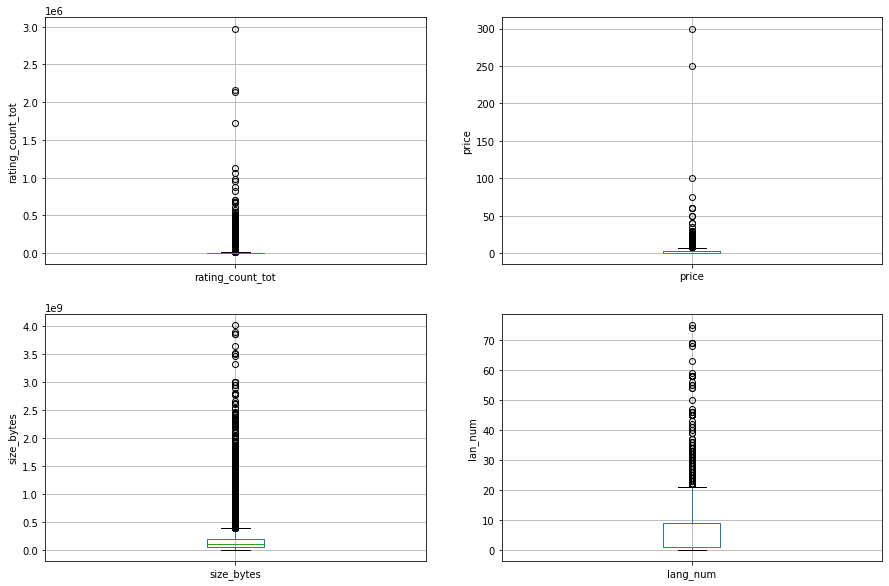

In [ ]:
# boxplot שרטוט של
# זאת על מנת לראות עבור אלו עמודות יש הרבה חריגים 


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='rating_count_tot')
fig.set_title('')
fig.set_ylabel('rating_count_tot')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='price')
fig.set_title('')
fig.set_ylabel('price')

plt.subplot(2, 2,3)
fig = df.boxplot(column='size_bytes')
fig.set_title('')
fig.set_ylabel('size_bytes')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='lang_num')
fig.set_title('')
fig.set_ylabel('lan_num')

plt.show()

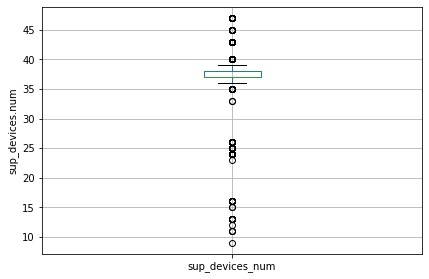

In [ ]:
# boxplot שרטוט של עוד
# cell כי אפשר לעשות רק 4 באותו 

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='sup_devices_num')
fig.set_title('')
fig.set_ylabel('sup_devices.num')

plt.show()

<div dir=rtl>

ה-`boxplots` לעיל מאשרים שיש הרבה חריגים.

</div>

<div dir=rtl>
- נשרטט היסטוגרמה כדי לבדוק התפלגויות על מנת לגלות האם הן תקינות או מוטות.

In [ ]:
df.head()

,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,100788224,3.99,21292,4.0,4+,Games,38,5,10,1
1,158578688,0.00,161065,4.0,4+,Productivity,37,5,23,1
2,100524032,0.00,188583,3.5,4+,Weather,37,5,3,1
3,128512000,0.00,262241,4.0,12+,Shopping,37,5,9,1
4,92774400,0.00,985920,4.5,4+,Reference,37,5,45,1


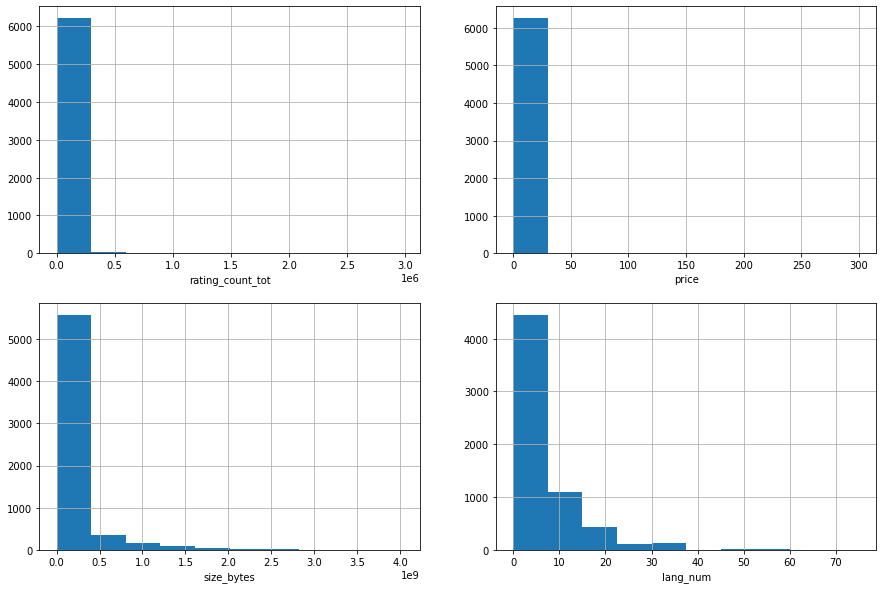

In [ ]:
# שרטוט היסטוגרמה להצגת התפלגות

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.rating_count_tot.hist(bins=10)
fig.set_xlabel('rating_count_tot')
fig.set_ylabel('')

plt.subplot(2, 2, 2)
fig = df.price.hist(bins=10)
fig.set_xlabel('price')
fig.set_ylabel('')

plt.subplot(2, 2, 3)
fig = df.size_bytes.hist(bins=10)
fig.set_xlabel('size_bytes')
fig.set_ylabel('')

plt.subplot(2, 2, 4)
fig = df.lang_num.hist(bins=10)
fig.set_xlabel('lang_num')
fig.set_ylabel('')


plt.show()

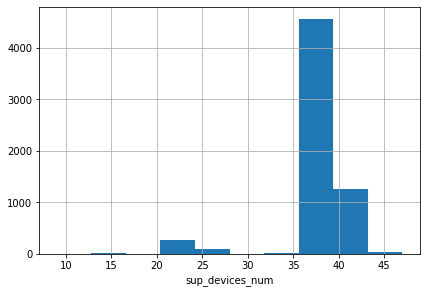

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = df.sup_devices_num.hist(bins=10)
fig.set_xlabel('sup_devices_num')
fig.set_ylabel('')
plt.show()

<div dir=rtl>

<div dir=rtl>

אפשר לראות שכל ארבע הערכים מוטים. לכן נשתמש ב-IQR למציאת חריגים.

</div>

In [ ]:
IQR = df.rating_count_tot.quantile(0.75) - df.rating_count_tot.quantile(0.25)
Lower_fence = df.rating_count_tot.quantile(0.25) - (IQR * 3)
Upper_fence = df.rating_count_tot.quantile(0.75) + (IQR * 3)
print('rating_count_tot outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

rating_count_tot outliers are values < -11578.5 or > 15620.0


In [ ]:
IQR = df.price.quantile(0.75) - df.price.quantile(0.25)
Lower_fence = df.price.quantile(0.25) - (IQR * 3)
Upper_fence = df.price.quantile(0.75) + (IQR * 3)
print('price outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

price outliers are values < -8.97 or > 11.96


In [ ]:
IQR = df.price.quantile(0.75) - df.price.quantile(0.25)
Lower_fence = df.size_bytes.quantile(0.25) - (IQR * 3)
Upper_fence = df.size_bytes.quantile(0.75) + (IQR * 3)
print('size_bytes outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

size_bytes outliers are values < 51719415.03 or > 188477448.97


In [ ]:
IQR = df.lang_num.quantile(0.75) - df.lang_num.quantile(0.25)
Lower_fence = df.lang_num.quantile(0.25) - (IQR * 3)
Upper_fence = df.lang_num.quantile(0.75) + (IQR * 3)
print('lang_num outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

lang_num outliers are values < -23.0 or > 33.0


In [ ]:
IQR = df.sup_devices_num.quantile(0.75) - df.sup_devices_num.quantile(0.25)
Lower_fence = df.sup_devices_num.quantile(0.25) - (IQR * 3)
Upper_fence = df.sup_devices_num.quantile(0.75) + (IQR * 3)
print('sup_devices_num outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

sup_devices_num outliers are values < 34.0 or > 41.0


<div dir=rtl>
<h1> אציג כמה נתונים גרפים לגבי משתנים מסוימים שיתנו תמונה יותר ברורה לגבי מערך הנתונים

<div dir=rtl>
כעת אציג גרף המציג את ההתפלגות של הדירוגים

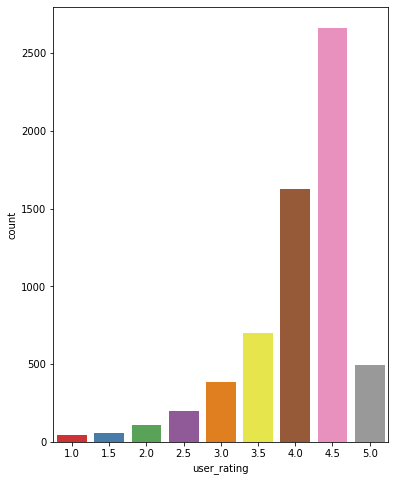

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="user_rating", data=df, palette="Set1")
plt.show()

<div dir=rtl>
זה אותו גרף רק עם צירים הפוכים

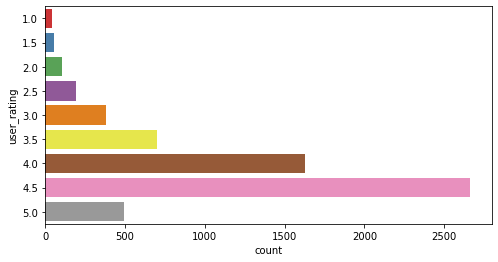

In [ ]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="user_rating", data=df, palette="Set1")
plt.show()

<div dir=rtl>
כל סוגי הז'אנרים של האפליקציות

In [ ]:
genres = df['prime_genre'].unique()
print("Total genres : {}".format(len(genres)))
print(genres)

Total genres : 23
['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs']


<div dir=rtl>
כמות האפליקציות החינמיות ואלו שבתשלום

In [ ]:
freeapps = df[df.price == 0.0]
paidapps = df[df.price != 0.0]

print("Free apps : ",len(freeapps))
print("Paid apps : ",len(paidapps))

Free apps :  3383
Paid apps :  2885


<div dir=rtl>
גרף שממחיש את כמות האפליקציות החינמיות לעומת אלו שבתשלום

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f23d084f150>],
      dtype=object)

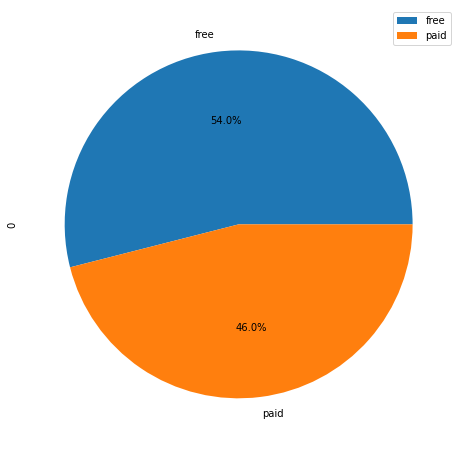

In [ ]:
app_pricedf= pd.DataFrame( [len(freeapps),len(paidapps)] , index=['free','paid'])
app_pricedf.plot(kind='pie', subplots=True, figsize=(16,8), autopct='%1.1f%%')

<div dir=rtl>
<h1> ניתוח רב-משתני / Multivariate Analysis<a class="anchor" name="7"></a>

- שלב חשוב בניתוח הנתונים הוא למצוא דפוסים וקשרים בין המשתנים השונים.

- נשתמש במפת חום (heatmap) וגרף פיזור על מנת לחקור את המשתנים השונים.

In [ ]:
correlation = df[numerical].corr()

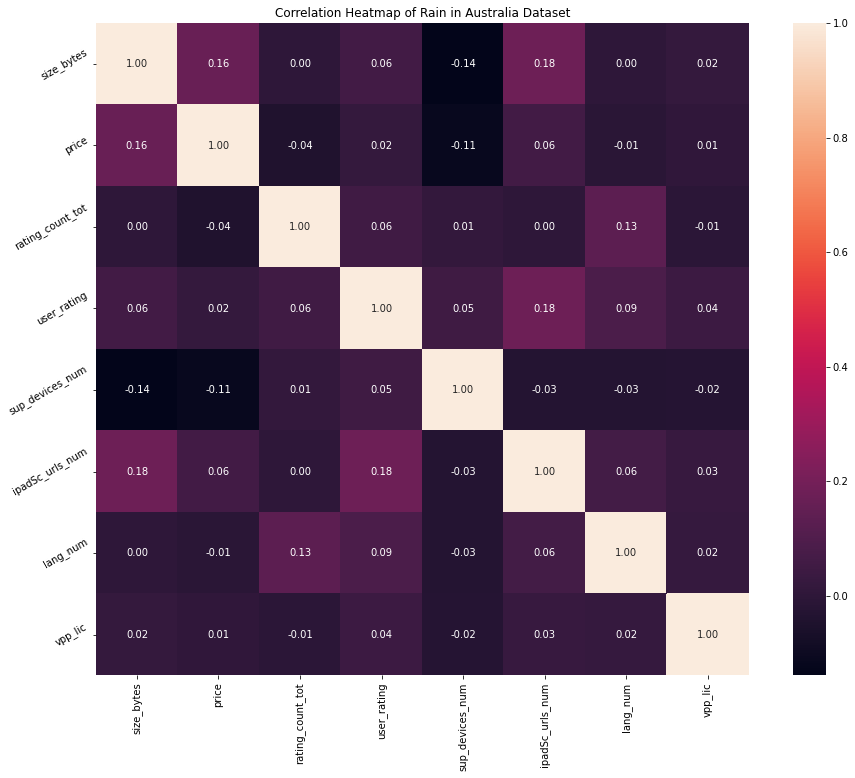

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

<div dir=rtl>
הקשר בין כל המשתנים למשתנה היעד `user_rating` בסדר יורד:

In [ ]:
correlation['user_rating'].sort_values(ascending=False)


user_rating         1.000000
ipadSc_urls_num     0.178877
lang_num            0.086507
size_bytes          0.057402
rating_count_tot    0.055342
sup_devices_num     0.048653
vpp_lic             0.039236
price               0.019287
Name: user_rating, dtype: float64


<div dir=rtl>
<h1> גרף זוגות / Pair Plot <a class="anchor" name="7.2"></a>

ראשית נשאיר רק את המשתנים שנמצאו בניהם קשרים חזקים (אני מתייחס למשתנים שיש בהם קשר עם משתנה אחד אחר לפחות של 0.15 ומעלה).

In [ ]:
num_var = ['size_bytes', 'price', 'user_rating', 'ipadSc_urls_num']

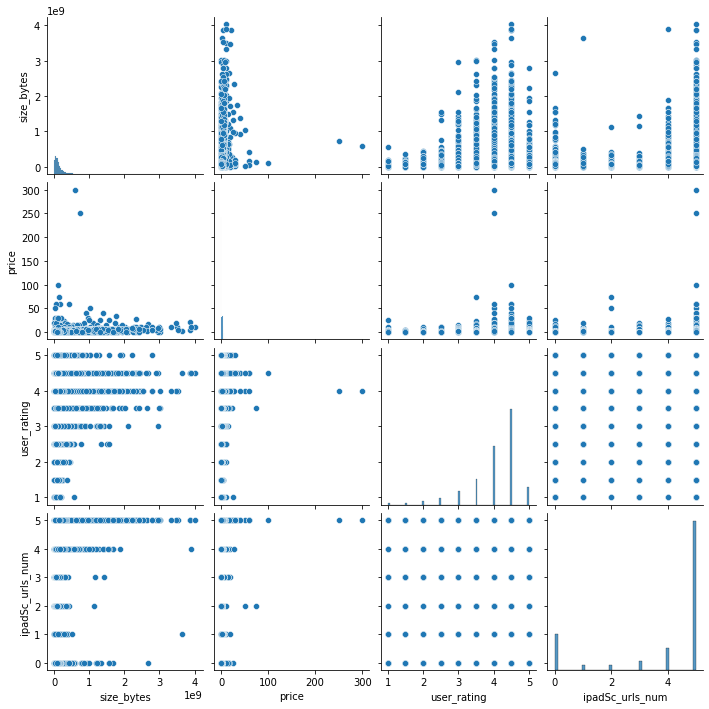

In [ ]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

<div dir=rtl>
כפי שניתן לראות, הקשרים בין המשתנים לא חזקים מספיק על מנת שניתן יהיה לאבחן פה קשר כלשהו (בגרף הזוגות)

<div dir=rtl>
<h1> המשך feature engineering כללי

In [ ]:
df.head()

,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,100788224,3.99,21292,4.0,4+,Games,38,5,10,1
1,158578688,0.00,161065,4.0,4+,Productivity,37,5,23,1
2,100524032,0.00,188583,3.5,4+,Weather,37,5,3,1
3,128512000,0.00,262241,4.0,12+,Shopping,37,5,9,1
4,92774400,0.00,985920,4.5,4+,Reference,37,5,45,1


<div dir=rtl>
כעת אעשה one hot encoder למשתנים הקטגוריאליים, על מנת שניתן יהיה להשתמש בהם בחיזוי (פרדיקציה)

In [ ]:
# מציאת משתנים קטגוריאליים

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['cont_rating', 'prime_genre']


In [ ]:
df = pd.get_dummies(df, columns = ['cont_rating', 'prime_genre'])

In [ ]:
df.head()

,size_bytes,price,rating_count_tot,user_rating,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic,cont_rating_12+,cont_rating_17+,cont_rating_4+,cont_rating_9+,prime_genre_Book,prime_genre_Business,prime_genre_Catalogs,prime_genre_Education,prime_genre_Entertainment,prime_genre_Finance,prime_genre_Food & Drink,prime_genre_Games,prime_genre_Health & Fitness,prime_genre_Lifestyle,prime_genre_Medical,prime_genre_Music,prime_genre_Navigation,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,100788224,3.99,21292,4.0,38,5,10,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,158578688,0.00,161065,4.0,37,5,23,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,100524032,0.00,188583,3.5,37,5,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,128512000,0.00,262241,4.0,37,5,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,92774400,0.00,985920,4.5,37,5,45,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<div dir=rtl>
<h1> הכנת הנתונים עבור מודל למידת המכונה

<div dir=rtl>
אני מחלק את המערך ל-X ו-Y, כשY הוא משתנה היעד שהגדרתי, אשר אותו מנסים לחזות - `user_rating`. 

In [ ]:

X = df.drop(['user_rating'], axis=1)

y = df['user_rating']




In [ ]:
X.head()

,size_bytes,price,rating_count_tot,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic,cont_rating_12+,cont_rating_17+,cont_rating_4+,cont_rating_9+,prime_genre_Book,prime_genre_Business,prime_genre_Catalogs,prime_genre_Education,prime_genre_Entertainment,prime_genre_Finance,prime_genre_Food & Drink,prime_genre_Games,prime_genre_Health & Fitness,prime_genre_Lifestyle,prime_genre_Medical,prime_genre_Music,prime_genre_Navigation,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,100788224,3.99,21292,38,5,10,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,158578688,0.00,161065,37,5,23,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,100524032,0.00,188583,37,5,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,128512000,0.00,262241,37,5,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,92774400,0.00,985920,37,5,45,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y.head()

0    4.0
1    4.0
2    3.5
3    4.0
4    4.5
Name: user_rating, dtype: float64

<div dir=rtl>
כעת אתייג את הערכים של `user_rating` לפי אם הם גדולים מ4 - אז יוחזר 1, ואם קטנים או שווים - יוחזר 0, וזאת על מנת לייצר את החיזוי האם האפליקציה תצליח (תקבל ציון של יותר מ4 על ידי המשתמש) או לא, על ידי binary classification למעשה.

In [ ]:
def categorize_rating(x):
      if x <= 4:
        return 0
      else:
        return 1

y = y.apply(categorize_rating)


In [ ]:
y.unique()

array([0, 1])

In [ ]:
y.shape

(6268,)

<div dir=rtl>
כעת אפצל את הנתונים לtrain ו- test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# בדיקת גודל של סט האימון וסט הבדיקה

X_train.shape, X_test.shape

((5014, 34), (1254, 34))

In [ ]:
y_train.shape, y_test.shape

((5014,), (1254,))

<div dir=rtl>

<h1> טיפול בערכים החריגים במשתנים המספריים <a class="anchor" name="10.3"></a>

נתקן ערכים אלו בעזרת הגבלת כל הערכים והפחתת החריגים למקסימום (בעזרת IQR שעשיתי קודם).

In [ ]:
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df3 in [X_train, X_test]:
    df3['rating_count_tot'] = max_value(df3, 'rating_count_tot', 15620.0)
    df3['price'] = max_value(df3, 'price', 11.96)
    df3['size_bytes'] = max_value(df3, 'size_bytes', 188477448.97)
    df3['lang_num'] = max_value(df3, 'lang_num', 33.0)
    df3['sup_devices_num'] = max_value(df3, 'sup_devices_num', 41.0)



In [ ]:
X_train.rating_count_tot.max(), X_test.rating_count_tot.max()

(15620.0, 15620.0)

In [ ]:
X_train.price.max(), X_test.price.max()

(11.96, 11.96)

In [ ]:
X_train.size_bytes.max(), X_test.size_bytes.max()

(188477448.97, 188477448.97)

In [ ]:
X_train.lang_num.max(), X_test.lang_num.max()

(33.0, 33.0)

In [ ]:
X_train.sup_devices_num.max(), X_test.sup_devices_num.max()

(41.0, 41.0)

<div dir=rtl>
<h1> נרמול הנתונים / Feature Scaling <a class="anchor" name="11"></a>

<div dir=rtl>
כעת אני אעשה גם סטנדריזציה (גורם לערכים להיות בטווח שבין 0 ל1) וגם נרמול של המודל (כל הערכים עם ממוצע 0 וסטיית תקן של 1) - בנפרד

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = (X_train - X_train.mean()) / X_train.std()

X_test = (X_test - X_test.mean()) / X_test.std()

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense



<div dir=rtl>
<h1> מודל למידת המכונה

<div dir=rtl>
בניית (הגדרת) המודל הכולל 4 שכבות, ב3 השכבות הראשונות 8,10 ו- 6 נוירונים בהתאמה ושימוש בפעולה האקטיבציה RELU, כשבשכבה האחרונה - של הפלט - יש נוירון אחד ונעשה שימוש בפעולה האקטיבציה sigmoid. כמו כן הגדרתי שהמשקלים של 3 השכבות הראשונות יאותחלו על פי גרסה מסוימת של התפלגות נורמלית. לפני כן הגדרתי את שכבת הקלט להיות עם מספר הממדים של התכונות.

In [ ]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(6, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))


<div dir=rtl>
אימון המודל עם אופטימיזציה מסוג ADAM ופונקצית loss מסוג binary_crossentropy, בהתייחסות לדיוק הכללי של המודל (accuracy), כשאני מחלק את הנתונים לקבוצות של 32 ו150 חזרות על הנתונים. כמו כן הגדרתי את verbose להיות 0 (לא חובה כלל) כי לא מעניין אותי "לראות" את ההרצה עצמה של תהליך האימון של המכונה.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

<div dir=rtl>
חיזוי בעזרת המודל ובחינת ביצועיו

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.690295398235321
Test accuracy: 0.6156299710273743


<div dir=rtl>
<h1> סיכום של העבודה שביצעתי בפרויקטון זה (פרויקטון 2): </h1>
בחרתי לחזות האם אפליקציה בחנות האפליקציות של אפל (Apple Store) תצליח, כשהנחתי ש"הצלחה" נמדדת על ידי השאלה - האם הדירוג שניתן על ידי המשתמשים לאפליקציה מסוימת גבוהה מציון 4 (מתוך 5 כשיש גם ציונים עם חצאים), משמע בהתייחס לתכונה `user_rating`. זאת, על ידי בדיקה של האפליקציות הנתונות במערך הנתונים שייבאתי מkaggle, שם נמצא מידע על אפליקציות מApple Store ומידע נוסף על כל אפליקציה, כגון ז'אנר (סוג) האפליקציה, גודלה, מחירה, וכמות ההצבעות (הדירוגים) על ידי המשתמשים לכל אפליקציה. בחרתי להתייחס דווקא לשאלה זאת, שכן לתחושתי זוהי שאלה שחיזוי שלה נותן הרבה יותר מידע פרקטי מאשר חיזוי הדירוג המדויק של כל אפליקציה, שכן לקחתי בחשבון שההבדל בין אפליקציה, לדוגמה, שדירוגה 2 לבין אפליקציה שדירוגה 2.5 הוא מינורי ושרירותי לחלוטין. לעומת זאת, בקביעה אם אפליקציה "תצליח" - לפי איך שאני הגדרתי, אם דירוגה גדול מ4 - הוא נתון שהוא (באופן יחסי) פחות שרירותי. המסקנה אליה הגעתי היא שניתן לחזות אם אפליקציה "תצליח" (דירוגה גדול או קטן מ4) באופן לא רע יחסית, עם דיוק (בהתחשב כמובן בtest set, משמע נתונים שהמכונה לא ראתה לפני כן) של בערך 62%. זאת על אף שכשמסתכלים על קשרים ישירים בין כל משתנה במערך לבין משתנה היעד (`user_rating`) לא מגלים התאמה ברמה מספיק גבוהה כך שהיא ניכרת לעין. 
תהליך העבודה היה מעט מאתגר ומסובך אך גם מעניין לצד זאת, שכן בתחילת העבודה ההוראות לא היו מובנות לי לחלוטין, כשעם הזמן הבנתי יותר למה בערך (גם אם לא באופן מדויק) צריך לעשות בפרויקטון הזה.